<a href="https://colab.research.google.com/github/sunilkami/AI_ML_Training/blob/main/Text_Generation_using_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Text Generation using RNN by `Mr. Harshit Dawar!`

In [9]:
import goose3
import numpy as np
from tensorflow.keras.layers import SimpleRNN, Dense, Embedding, Input
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

## Extracting the Data

In [10]:
goose = goose3.Goose()

In [11]:
data = goose.extract("https://en.wikipedia.org/wiki/Natural_language_processing")
data = data.cleaned_text

In [12]:
data

'Natural language processing (NLP) is a subfield of linguistics, computer science, and artificial intelligence concerned with the interactions between computers and human language, in particular how to program computers to process and analyze large amounts of natural language data. The goal is a computer capable of "understanding" the contents of documents, including the contextual nuances of the language within them. The technology can then accurately extract information and insights contained in the documents as well as categorize and organize the documents themselves.\n\nNatural language processing has its roots in the 1950s. Already in 1950, Alan Turing published an article titled "Computing Machinery and Intelligence" which proposed what is now called the Turing test as a criterion of intelligence, a task that involves the automated interpretation and generation of natural language, but at the time not articulated as a problem separate from artificial intelligence.\n\nThe premise 

## Text Generation

In [13]:
"""
You have a Text sequence, now, based on that sequence, you have to predict what will be the next word 
or next set of words. 

For this use-case, we have to first generate text sequneces, and some word that might appear affter that sequence,
based on this dataset, we will generate the LSTM Model, that will take sequences as features, & the word that
comes after the sequences as the target to understand the pattern!

Important Pointers:
1. Length of the sequence should be same for each sequence in the sequences/dataset. If it is not same, then you
have to pad that sequence.
"""

'\nYou have a Text sequence, now, based on that sequence, you have to predict what will be the next word \nor next set of words. \n\nFor this use-case, we have to first generate text sequneces, and some word that might appear affter that sequence,\nbased on this dataset, we will generate the LSTM Model, that will take sequences as features, & the word that\ncomes after the sequences as the target to understand the pattern!\n\nImportant Pointers:\n1. Length of the sequence should be same for each sequence in the sequences/dataset. If it is not same, then you\nhave to pad that sequence.\n'

### Token Generation

In [14]:
import spacy
ENGLISH_MODEL = spacy.load("en_core_web_sm", disable = ["ner", "tagger"])

In [15]:
import warnings
warnings.filterwarnings("ignore")

In [16]:
tokens = [token.text for token in ENGLISH_MODEL(data) if not token.is_punct]

In [17]:
tokens

['Natural',
 'language',
 'processing',
 'NLP',
 'is',
 'a',
 'subfield',
 'of',
 'linguistics',
 'computer',
 'science',
 'and',
 'artificial',
 'intelligence',
 'concerned',
 'with',
 'the',
 'interactions',
 'between',
 'computers',
 'and',
 'human',
 'language',
 'in',
 'particular',
 'how',
 'to',
 'program',
 'computers',
 'to',
 'process',
 'and',
 'analyze',
 'large',
 'amounts',
 'of',
 'natural',
 'language',
 'data',
 'The',
 'goal',
 'is',
 'a',
 'computer',
 'capable',
 'of',
 'understanding',
 'the',
 'contents',
 'of',
 'documents',
 'including',
 'the',
 'contextual',
 'nuances',
 'of',
 'the',
 'language',
 'within',
 'them',
 'The',
 'technology',
 'can',
 'then',
 'accurately',
 'extract',
 'information',
 'and',
 'insights',
 'contained',
 'in',
 'the',
 'documents',
 'as',
 'well',
 'as',
 'categorize',
 'and',
 'organize',
 'the',
 'documents',
 'themselves',
 '\n\n',
 'Natural',
 'language',
 'processing',
 'has',
 'its',
 'roots',
 'in',
 'the',
 '1950s',
 'Alre

In [18]:
len(tokens)

2412

In [19]:
## Generating Sequences of 20 words
sequence_length = 20
sequences = []

for i in range(len(tokens) - sequence_length):
    sequences.append(tokens[i : i + sequence_length])

In [20]:
" ".join(sequences[0])

'Natural language processing NLP is a subfield of linguistics computer science and artificial intelligence concerned with the interactions between computers'

In [21]:
" ".join(sequences[1])

'language processing NLP is a subfield of linguistics computer science and artificial intelligence concerned with the interactions between computers and'

In [22]:
len(sequences)

2392

## Keras Tokenizer & Transforming the data to be used by the Model

In [23]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(sequences)

In [24]:
tokenizer.word_counts

OrderedDict([('natural', 381),
             ('language', 562),
             ('processing', 283),
             ('nlp', 399),
             ('is', 585),
             ('a', 986),
             ('subfield', 7),
             ('of', 2279),
             ('linguistics', 129),
             ('computer', 90),
             ('science', 51),
             ('and', 972),
             ('artificial', 33),
             ('intelligence', 74),
             ('concerned', 15),
             ('with', 356),
             ('the', 2637),
             ('interactions', 18),
             ('between', 39),
             ('computers', 40),
             ('human', 80),
             ('in', 1000),
             ('particular', 40),
             ('how', 40),
             ('to', 1008),
             ('program', 20),
             ('process', 60),
             ('analyze', 40),
             ('large', 80),
             ('amounts', 60),
             ('data', 300),
             ('goal', 20),
             ('capable', 20),
             ('und

In [25]:
tokenizer.word_index

{'\n': 23,
 '\n\n': 18,
 '"[37': 773,
 "'s": 108,
 '+': 280,
 '1950': 316,
 '1950s': 174,
 '1954': 346,
 '1960s': 190,
 '1964': 386,
 '1966': 187,
 '1970s': 198,
 '1975': 417,
 '1976': 424,
 '1977': 426,
 '1978': 200,
 '1979': 429,
 '1980s': 61,
 '1981': 432,
 '1990s': 89,
 '1999': 725,
 '2000s': 505,
 '2002': 728,
 '2003': 730,
 '2006': 737,
 '2007': 743,
 '2009': 745,
 '2010s': 523,
 '2012': 747,
 '2015,[19': 657,
 '2017': 748,
 '2018': 750,
 '2020': 254,
 '40': 749,
 '60+/100': 751,
 'a': 5,
 'abandoned': 658,
 'able': 482,
 'about': 389,
 'above': 766,
 'accidentally': 568,
 'accurate': 143,
 'accurately': 307,
 'achieve': 235,
 'acl': 850,
 'acquiring': 771,
 'act': 843,
 'action': 770,
 'additional': 814,
 'addressed': 829,
 'advanced': 762,
 'advantage': 220,
 'advantages': 556,
 'after': 186,
 'age': 781,
 'ai".[46': 857,
 'aid': 704,
 'alan': 317,
 'algorithm': 125,
 'algorithms': 46,
 'alignment': 690,
 'alike': 813,
 'all': 135,
 'almost': 387,
 'along': 790,
 'alpac': 359,


In [26]:
vocabulary_length = len(tokenizer.word_counts) + 1

In [27]:
vocabulary_length

865

In [28]:
for k,v in tokenizer.word_index.items():
    if v == 17:
        print(k)

natural


In [29]:
converted_sequences = tokenizer.texts_to_sequences(sequences)

In [30]:
sequences[0]

['Natural',
 'language',
 'processing',
 'NLP',
 'is',
 'a',
 'subfield',
 'of',
 'linguistics',
 'computer',
 'science',
 'and',
 'artificial',
 'intelligence',
 'concerned',
 'with',
 'the',
 'interactions',
 'between',
 'computers']

In [31]:
converted_sequences[0], len(converted_sequences[0])

([17,
  8,
  27,
  16,
  7,
  5,
  861,
  2,
  58,
  79,
  164,
  6,
  298,
  103,
  858,
  21,
  1,
  856,
  296,
  166],
 20)

In [32]:
converted_sequences = np.array(converted_sequences)

In [33]:
converted_sequences

array([[ 17,   8,  27, ..., 856, 296, 166],
       [  8,  27,  16, ..., 296, 166,   6],
       [ 27,  16,   7, ..., 166,   6,  80],
       ...,
       [ 14, 854,   1, ..., 862,  16, 863],
       [854,   1, 855, ...,  16, 863, 864],
       [  1, 855,   2, ..., 863, 864, 165]])

In [34]:
X = converted_sequences[:, : -1]

In [35]:
X

array([[ 17,   8,  27, ...,   1, 856, 296],
       [  8,  27,  16, ..., 856, 296, 166],
       [ 27,  16,   7, ..., 296, 166,   6],
       ...,
       [ 14, 854,   1, ...,  48, 862,  16],
       [854,   1, 855, ..., 862,  16, 863],
       [  1, 855,   2, ...,  16, 863, 864]])

In [36]:
y = converted_sequences[:, -1]

In [37]:
y, len(y)

(array([166,   6,  80, ..., 863, 864, 165]), 2392)

In [38]:
y.shape

(2392,)

In [39]:
from tensorflow.keras.utils import to_categorical

In [40]:
converted_labels = to_categorical(y, num_classes = vocabulary_length)

In [41]:
converted_labels.shape

(2392, 865)

In [42]:
for index in range(len(converted_labels[0])):
    if converted_labels[0][index] == 1:
        print(index)

166


In [43]:
converted_labels[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [44]:
for k,v in tokenizer.word_index.items():
    if v == 166:
        print(k)

computers


## Model Generation

In [45]:
X.shape

(2392, 19)

In [46]:
# Both syntax below are correct

# input_layer = Input(shape = (sequence_length - 1, ))
input_layer = Input(shape = (X.shape[1], ))

mod = Embedding(input_dim = vocabulary_length,
                output_dim = sequence_length,
                input_length = sequence_length) (input_layer)

mod = SimpleRNN(units = 75) (mod)

outputs = Dense(units = vocabulary_length, activation = "softmax") (mod)

RNN_Model = Model(input_layer, outputs, name = "RNN_Model_to_Generate_Texts" )

In [47]:
RNN_Model.summary()

Model: "RNN_Model_to_Generate_Texts"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 19)]              0         
_________________________________________________________________
embedding (Embedding)        (None, 19, 20)            17300     
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 75)                7200      
_________________________________________________________________
dense (Dense)                (None, 865)               65740     
Total params: 90,240
Trainable params: 90,240
Non-trainable params: 0
_________________________________________________________________


In [48]:
RNN_Model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])

In [49]:
history = RNN_Model.fit(X, converted_labels, epochs = 100, verbose = 1)

Epoch 1/100
75/75 [==============================] - 1s 5ms/step - loss: 6.4024 - accuracy: 0.0477
Epoch 2/100
75/75 [==============================] - 0s 6ms/step - loss: 5.9624 - accuracy: 0.0548
Epoch 3/100
75/75 [==============================] - 0s 5ms/step - loss: 5.9208 - accuracy: 0.0560
Epoch 4/100
75/75 [==============================] - 0s 5ms/step - loss: 5.8906 - accuracy: 0.0548
Epoch 5/100
75/75 [==============================] - 0s 6ms/step - loss: 5.8502 - accuracy: 0.0677
Epoch 6/100
75/75 [==============================] - 0s 6ms/step - loss: 5.7882 - accuracy: 0.0773
Epoch 7/100
75/75 [==============================] - 0s 5ms/step - loss: 5.6861 - accuracy: 0.0769
Epoch 8/100
75/75 [==============================] - 0s 5ms/step - loss: 5.5544 - accuracy: 0.0828
Epoch 9/100
75/75 [==============================] - 0s 5ms/step - loss: 5.3956 - accuracy: 0.0903
Epoch 10/100
75/75 [==============================] - 0s 6ms/step - loss: 5.2339 - accuracy: 0.1016
Epoch 11/

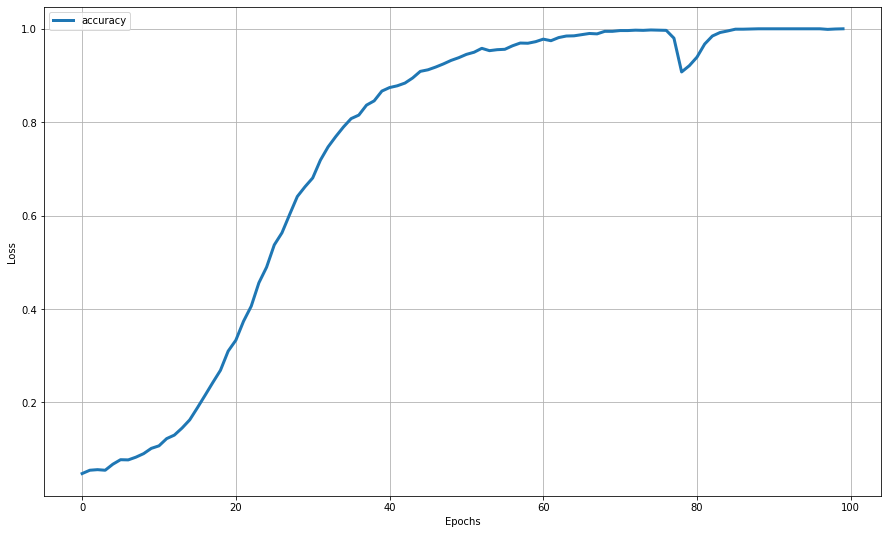

In [50]:
import matplotlib.pyplot as plt
plt.figure(figsize = (15, 9))
plt.plot(history.history["accuracy"], label = "accuracy", linewidth = 3)
# plt.plot(history.history["loss"], label = "loss", linewidth = 3)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.grid()
plt.legend()
plt.show()

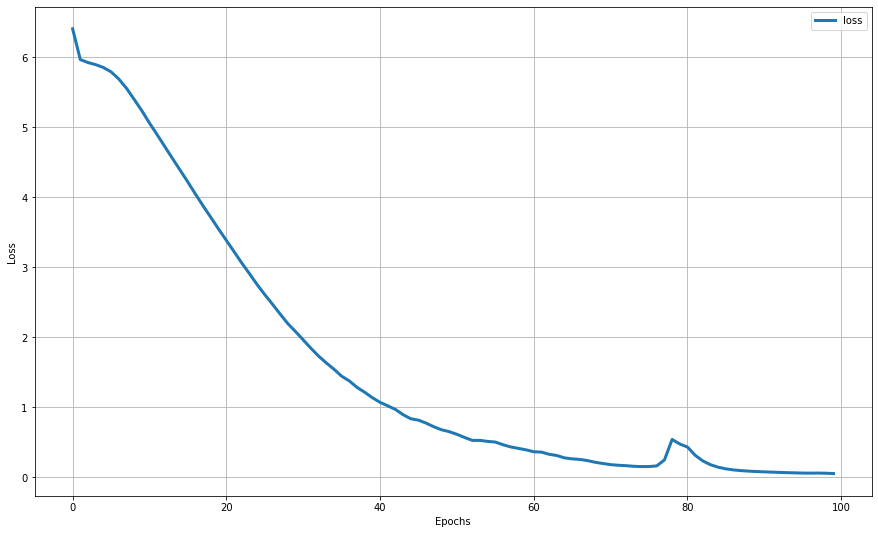

In [51]:
plt.figure(figsize = (15, 9))
# plt.plot(history.history["accuracy"], label = "accuracy", linewidth = 3)
plt.plot(history.history["loss"], label = "loss", linewidth = 3)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.grid()
plt.legend()
plt.show()